In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from utils import ftxTransformer, chainlinkTransformer
from trading_utils import checkLongExit,checkShortExit,checkEntry,moonshot_backtest
import time

## FTX DATA

In [2]:
data = pd.read_csv("ftx_PriceDataETH-PERP_1614906000_1646645961.csv")
hourlyData,weeklyData = ftxTransformer(data)

In [3]:
capital = 100
stables_yield = 0.12
leverage = 9.0
mm_min = 0.0625 #perp protocol
freq = 7 #weekly

take_profit = 0.20
stop_loss = 0.05

t = time.time()
weeklyData, finalCapital = moonshot_backtest(hourlyData, weeklyData, capital, stables_yield, freq, leverage, take_profit, stop_loss, mm_min)
elapsed = time.time()-t

#results

print("Trading Alpha  \t : {a:1.3f}".format(a=weeklyData.trading_returns.sum()))
print("Accuracy  \t : {a:2.1f}% \n".format(a=weeklyData.loc[weeklyData.position * weeklyData.price_change > 0].shape[0]/weeklyData.shape[0]*100))

print("Positive Returns : {a:2.1f}%".format(a=weeklyData.loc[weeklyData.trading_returns >= 0].shape[0]/weeklyData.shape[0]*100))
print("Stopped Out \t : {a:2.1f}%".format(a=weeklyData.loc[weeklyData.flag=='stop_loss'].shape[0]/weeklyData.shape[0]*100))
print("Liquidations \t : {a:2.1f}% \n".format(a=weeklyData.loc[weeklyData.flag=='liquidated'].shape[0]/weeklyData.shape[0]*100))
print("APY% \t \t : {a:2.1f}%".format(a=(finalCapital-100) / weeklyData.shape[0] *52))
print("Alpha APY% \t : {a:2.1f}%".format(a=(weeklyData.trading_returns.sum()) / weeklyData.shape[0] *52))



Trading Alpha  	 : 2.786
Accuracy  	 : 56.6% 

Positive Returns : 43.4%
Stopped Out 	 : 52.8%
Liquidations 	 : 0.0% 

APY% 	 	 : 15.1%
Alpha APY% 	 : 2.7%


Text(0.5, -0.01, 'FTX Data Backtest')

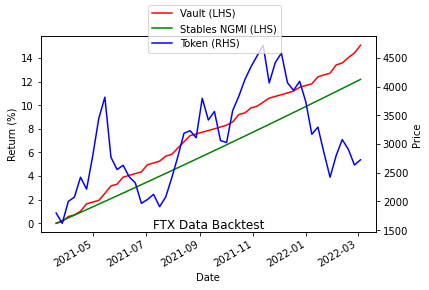

In [4]:
fig = plt.figure()
ax1 = (weeklyData.capital[2:]-100).plot(color = 'red')
(weeklyData.benchmark.shift(2)-100).plot(color ='green') #two week lag in vault returns
ax1.set_ylabel('Return (%)')
plt.twinx()
ax2 = (weeklyData.close[2:]).plot(color ='blue')
ax2.set_ylabel('Price')
fig.legend(['Vault (LHS)','Stables NGMI (LHS)','Token (RHS)'],loc='upper center')
ax1.set_xlabel('Date')
plt.title('FTX Data Backtest', y=-0.01)

In [5]:
#additional analysis
positiveReturns = weeklyData[weeklyData.trading_returns > 0]
negativeReturns = weeklyData[weeklyData.trading_returns < 0]
stopped = weeklyData[weeklyData.flag == 'stop_loss']
takePROFIT = weeklyData[weeklyData.flag == 'take_profit']
inRANGE = weeklyData[weeklyData.flag == 'in_range']

stoppedAccuracy = (stopped.position*stopped.price_change>0).sum()
takePROFITaccuracy = (takePROFIT.position*takePROFIT.price_change>0).sum()
inRangeAccuracy = (inRANGE.position*inRANGE.price_change>0).sum()

print("Flag.     Number \t Leverage  Accuracy")
print("StopLoss    {a:2.1f} \t {b:2.1f} \t   {c:2.1f}  ".format(a=stopped.shape[0],b=stopped.leverage.mean(),c=stoppedAccuracy))
print("TakeProfit  {a:2.1f} \t {b:2.1f} \t   {c:2.1f}  ".format(a=takePROFIT.shape[0],b=takePROFIT.leverage.mean(),c=takePROFITaccuracy))
print("InRange     {a:2.1f} \t {b:2.1f} \t   {c:2.1f}  ".format(a=inRANGE.shape[0],b=inRANGE.leverage.mean(),c=inRangeAccuracy))
print("Total       {a:2.1f} \t {b:2.1f} \t   {c:2.1f}  ".format(a=inRANGE.shape[0]+takePROFIT.shape[0]+stopped.shape[0],b= 0,c=inRangeAccuracy+takePROFITaccuracy +stoppedAccuracy))

Flag.     Number 	 Leverage  Accuracy
StopLoss    28.0 	 7.9 	   7.0  
TakeProfit  8.0 	 7.9 	   8.0  
InRange     15.0 	 8.0 	   15.0  
Total       51.0 	 0.0 	   30.0  


## CHAINLINK DATA ANALYSIS

In [6]:
data = pd.read_csv("rounds.csv")
data_processed,weeklyData,hourlyData = chainlinkTransformer(data)


In [7]:
capital = 100
stables_yield = 0.12
leverage = 9.0
mm_min = 0.0625 #perp protocol
freq = 7 #weekly

take_profit = 0.20
stop_loss = 0.05


t = time.time()
weeklyData, finalCapital = moonshot_backtest(hourlyData, weeklyData, capital, stables_yield, freq, leverage, take_profit, stop_loss, mm_min)
elapsed = time.time()-t

#results
print("Trading Alpha  \t : {a:1.3f}".format(a=weeklyData.trading_returns.sum()))
print("Accuracy  \t : {a:2.1f}% \n".format(a=weeklyData.loc[weeklyData.position * weeklyData.price_change > 0].shape[0]/weeklyData.shape[0]*100))

print("Positive Returns : {a:2.1f}%".format(a=weeklyData.loc[weeklyData.trading_returns >= 0].shape[0]/weeklyData.shape[0]*100))
print("Stopped Out \t : {a:2.1f}%".format(a=weeklyData.loc[weeklyData.flag=='stop_loss'].shape[0]/weeklyData.shape[0]*100))
print("Liquidations \t : {a:2.1f}% \n".format(a=weeklyData.loc[weeklyData.flag=='liquidated'].shape[0]/weeklyData.shape[0]*100))

print("APY% \t \t : {a:2.1f}%".format(a=(finalCapital-100) / weeklyData.shape[0] *52))
print("Alpha APY% \t : {a:2.1f}%".format(a=(weeklyData.trading_returns.sum()) / weeklyData.shape[0] *52))



Trading Alpha  	 : 1.085
Accuracy  	 : 58.3% 

Positive Returns : 45.8%
Stopped Out 	 : 45.8%
Liquidations 	 : 0.0% 

APY% 	 	 : 13.6%
Alpha APY% 	 : 2.4%


Text(0.5, -0.01, 'Chainlink Data Backtest')

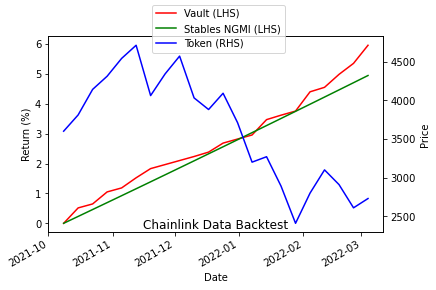

In [8]:
fig = plt.figure()
ax1 = (weeklyData.capital[2:]-100).plot(color = 'red')
(weeklyData.benchmark.shift(2)-100).plot(color ='green') #two week lag in vault returns
ax1.set_ylabel('Return (%)')
plt.twinx()
ax2 = (weeklyData.close[2:]).plot(color ='blue')
ax2.set_ylabel('Price')
fig.legend(['Vault (LHS)','Stables NGMI (LHS)','Token (RHS)'],loc='upper center')
ax1.set_xlabel('Date')
plt.title('Chainlink Data Backtest', y=-0.01)